In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

from imblearn.over_sampling import SMOTE


In [ ]:
# Installation: pip install simfin
# import simfin package
!pip install simfin
import simfin as sf

# Set your API-key for downloading data.
sf.set_api_key('79f8076c-cdc4-4ffe-9827-a82f92215739')

# Set the local directory where data-files are stored.
# The directory will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')

# Download the data from the SimFin server and load into a Pandas DataFrame.
prices_df = sf.load_shareprices(variant='daily')

# Print the first rows of the data.
print(prices_df.info)

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
<bound method DataFrame.info of                    SimFinId   Open   High    Low  Close  Adj. Close   Volume  \
Ticker Date                                                                    
A      2019-04-12     45846  81.43  82.06  80.90  80.98       77.77  1249295   
       2019-04-15     45846  81.00  81.13  79.91  80.40       77.22  1627268   
       2019-04-16     45846  80.82  80.96  77.19  77.55       74.48  3441597   
       2019-04-17     45846  78.15  78.32  74.46  75.43       72.44  4471971   
       2019-04-18     45846  75.73  76.54  75.31  76.17       73.16  2874195   
...                     ...    ...    ...    ...    ...         ...      ...   
ZYXI   2024-03-11    171401  12.83  13.07  12.67  12.69       12.69   150265   
       2024-03-12    171401  12.69  12.87  12.59  12.60       12.60   151053   
       2024-03-13    171401  12.57  12.81  12.57  12.69       12.69    89921   
       2024-03-14    171401  12.69  12.73  12.18  12.19       12.19   313909   
  

In [4]:
googldf = prices_df.loc['GOOG'].loc['2019-04-01':'2024-03-01']
metadf = prices_df.loc['META'].loc['2019-04-01':'2024-03-01']
aapldf = prices_df.loc['AAPL'].loc['2019-04-01':'2024-03-01']
forddf = prices_df.loc['F'].loc['2019-04-01':'2024-03-01']
netflixdf = prices_df.loc['NFLX'].loc['2019-04-01':'2024-03-01']
final_prices_df = pd.concat([googldf, metadf, aapldf, forddf, netflixdf])

In [5]:
final_prices_df.to_csv('./final_prices.csv', index=True)

In [6]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
balance_df = sf.load_balance(variant='quarterly')


# Print the first rows of the data.
print(balance_df.head())

Dataset "us-balance-quarterly" on disk (12 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-05-30     317000000.0       321000000.0   
       2019-07-31     2019-08-30     312000000.0       316000000.0   
       2019-10-31     2020-12-18     309000000.0       313000000.0   
       2020-01-31     2020-03-03     310000000.0       313000000.0   
      

In [7]:
googldf_balance = balance_df.loc['GOOG']
metadf_balance = balance_df.loc['META']
aapldf_balance = balance_df.loc['AAPL']
forddf_balance = balance_df.loc['F']
netflixdf_balance = balance_df.loc['NFLX']
final_balance_df = pd.concat([googldf_balance, metadf_balance, aapldf_balance, forddf_balance, netflixdf_balance])

In [8]:
final_balance_df.to_csv('./Balance-sheet.csv', index=True)

In [9]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
income_df = sf.load_income(variant='quarterly')


# Print the first rows of the data.
print(income_df.head())

Dataset "us-income-quarterly" on disk (4 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-05-30     317000000.0       321000000.0   
       2019-07-31     2019-08-30     312000000.0       316000000.0   
       2019-10-31     2019-08-30     309000000.0       313000000.0   
       2020-01-31     2021-03-02     310000000.0       313000000.0   
      

In [10]:
googldf_statement = income_df.loc['GOOG']
metadf_statement = income_df.loc['META']
aapldf_statement = income_df.loc['AAPL']
forddf_statement = income_df.loc['F']
netflixdf_statement = income_df.loc['NFLX']
final_income_df = pd.concat([googldf_statement, metadf_statement, aapldf_statement, forddf_statement, netflixdf_statement])

In [11]:
final_income_df.to_csv('./Income_statement.csv', index=True)

In [12]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
cashflow_df = sf.load_cashflow(variant='quarterly')


# Print the first rows of the data.
print(cashflow_df.head())

Dataset "us-cashflow-quarterly" on disk (4 days old).
- Loading from disk ... 

/opt/anaconda3/lib/python3.12/site-packages/simfin/load.py:154: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2019-04-30      45846      USD         2019            Q2   2019-05-30   
       2019-07-31      45846      USD         2019            Q3   2019-08-30   
       2019-10-31      45846      USD         2019            Q4   2019-12-19   
       2020-01-31      45846      USD         2020            Q1   2020-03-03   
       2020-04-30      45846      USD         2020            Q2   2020-06-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2019-04-30     2019-03-05     317000000.0       321000000.0   
       2019-07-31     2019-05-30     312000000.0       316000000.0   
       2019-10-31     2019-08-30     309000000.0       313000000.0   
       2020-01-31     2021-03-02     310000000.0       313000000.0   
      

In [13]:
googldf_cashflow = cashflow_df.loc['GOOG']
metadf_cashflow = cashflow_df.loc['META']
aapldf_cashflow = cashflow_df.loc['AAPL']
forddf_cashflow = cashflow_df.loc['F']
netflixdf_cashflow = cashflow_df.loc['NFLX']
cash_flow_df = pd.concat([googldf_cashflow, metadf_cashflow, aapldf_cashflow, forddf_cashflow, netflixdf_cashflow])

print(cash_flow_df.head())

             SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Report Date                                                              
2019-06-30         18      USD         2019            Q2   2019-07-26   
2019-09-30         18      USD         2019            Q3   2019-10-29   
2019-12-31         18      USD         2019            Q4   2020-02-04   
2020-03-31         18      USD         2020            Q1   2020-04-29   
2020-06-30         18      USD         2020            Q2   2020-07-31   

            Restated Date  Shares (Basic)  Shares (Diluted)  \
Report Date                                                   
2019-06-30     2019-04-30    1.387938e+10      1.492958e+10   
2019-09-30     2020-10-30    1.385482e+10      1.489428e+10   
2019-12-31     2020-10-30    1.377610e+10      1.483356e+10   
2020-03-31     2021-04-28    1.372930e+10      1.477382e+10   
2020-06-30     2021-04-28    1.363536e+10      1.466758e+10   

             Net Income/Starting Line  

In [14]:
cash_flow_df.to_csv('./Cash_flow.csv', index=True)

In [15]:
# File paths
prices_file = "final_prices.csv"
balance_file = "Balance-sheet.csv"
cashflow_file = "Cash_flow.csv"
income_file = "Income_statement.csv"

# Load datasets
df_prices = pd.read_csv(prices_file)
df_balance = pd.read_csv(balance_file, sep=",")
df_cashflow = pd.read_csv(cashflow_file, sep=",")
df_income = pd.read_csv(income_file, sep=",")

# Print column names and data types
print("Stock Prices Columns:\n", df_prices.dtypes)
print("\nBalance Sheet Columns:\n", df_balance.dtypes)
print("\nCash Flow Columns:\n", df_cashflow.dtypes)
print("\nIncome Statement Columns:\n", df_income.dtypes)


Stock Prices Columns:
 Date                   object
SimFinId                int64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj. Close            float64
Volume                  int64
Dividend              float64
Shares Outstanding    float64
dtype: object

Balance Sheet Columns:
 Report Date                                         object
SimFinId                                             int64
Currency                                            object
Fiscal Year                                          int64
Fiscal Period                                       object
Publish Date                                        object
Restated Date                                       object
Shares (Basic)                                     float64
Shares (Diluted)                                   float64
Cash, Cash Equivalents & Short Term Investments    float64
Accounts & Notes Receivable                     

In [16]:
# Example manual mapping (replace with your actual mapping)
simfin_ticker_mapping = {
    111052: 'AAPL', 
    83548: 'NFLX',
    18: 'GOOG',
    121021: 'META',
    249937: 'F'

}

# Convert mapping to DataFrame
mapping_df = pd.DataFrame(list(simfin_ticker_mapping.items()), columns=['SimFinId', 'Ticker'])

# Merge the mapping with the other datasets
df_income = df_income.merge(mapping_df, on='SimFinId', how='left')
df_balance = df_balance.merge(mapping_df, on='SimFinId', how='left')
df_cashflow = df_cashflow.merge(mapping_df, on='SimFinId', how='left')
df_prices = df_prices.merge(mapping_df, on='SimFinId', how='left')

In [22]:
df_income.columns

Index(['Report Date', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Publish Date', 'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Ticker'],
      dtype='object')

In [23]:
# Convert 'Date' columns to datetime format
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
df_balance["Report Date"] = pd.to_datetime(df_balance["Report Date"])
df_cashflow["Report Date"] = pd.to_datetime(df_cashflow["Report Date"])
df_income["Report Date"] = pd.to_datetime(df_income["Report Date"])

# Rename 'Report Date' to 'Date' for consistency
df_balance.rename(columns={"Report Date": "Date"}, inplace=True)
df_cashflow.rename(columns={"Report Date": "Date"}, inplace=True)
df_income.rename(columns={"Report Date": "Date"}, inplace=True)

In [24]:
# Function to merge financials with the nearest available report date
df_merged = df_prices.merge(df_balance, on=["Ticker", "Date"], how="left", suffixes=("", "_balance"))
# Merge with cash flow data
df_merged = df_merged.merge(df_cashflow, on=["Ticker", "Date"], how="left", suffixes=("", "_cashflow"))
# Merge with income statement data
df_merged = df_merged.merge(df_income, on=["Ticker", "Date"], how="left", suffixes=("", "_income"))

In [ ]:
# # Load datasets
# df_prices = pd.read_csv("final_prices.csv")
# df_balance = pd.read_csv("Balance-sheet.csv", sep=",")
# df_cashflow = pd.read_csv("Cash_flow.csv", sep=",")
# df_income = pd.read_csv("Income_statement.csv", sep=",")

# # Convert 'Date' columns to datetime format
# df_prices["Date"] = pd.to_datetime(df_prices["Date"])
# df_balance["Report Date"] = pd.to_datetime(df_balance["Report Date"])
# df_cashflow["Report Date"] = pd.to_datetime(df_cashflow["Report Date"])
# df_income["Report Date"] = pd.to_datetime(df_income["Report Date"])

# # Rename 'Report Date' to 'Date' for consistency
# df_balance.rename(columns={"Report Date": "Date"}, inplace=True)
# df_cashflow.rename(columns={"Report Date": "Date"}, inplace=True)
# df_income.rename(columns={"Report Date": "Date"}, inplace=True)

# # Define selected tickers
# selected_tickers = ["GOOG", "META", "AAPL", "F", "NFLX"]

# # Filter only selected tickers
# # df_prices = df_prices[df_prices["Ticker"].isin(selected_tickers)]
# # df_balance = df_balance[df_balance["Ticker"].isin(selected_tickers)]
# # df_cashflow = df_cashflow[df_cashflow["Ticker"].isin(selected_tickers)]
# # df_income = df_income[df_income["Ticker"].isin(selected_tickers)]

# # Function to merge financials with the nearest available report date
# df_merged = df_prices.merge(df_balance, on=["Ticker", "Date"], how="left", suffixes=("", "_balance"))
# # Merge with cash flow data
# df_merged = df_merged.merge(df_cashflow, on=["Ticker", "Date"], how="left", suffixes=("", "_cashflow"))
# # Merge with income statement data
# df_merged = df_merged.merge(df_income, on=["Ticker", "Date"], how="left", suffixes=("", "_income"))



0       GOOG
1       GOOG
2       GOOG
3       GOOG
4       GOOG
        ... 
6145    NFLX
6146    NFLX
6147    NFLX
6148    NFLX
6149    NFLX
Name: Ticker, Length: 6150, dtype: object

In [31]:
# Create binary target variable (1 = Price Up, 0 = Price Down)
df_merged["Price_Up"] = (df_merged["Close"].shift(-1) > df_merged["Close"]).astype(int)
df_merged = df_merged[:-1]  # Drop last row since it has no next-day price

# Add technical indicators
def add_technical_indicators(df):
    df["SMA_5"] = df["Close"].rolling(window=5).mean()
    df["SMA_10"] = df["Close"].rolling(window=10).mean()
    df["RSI_14"] = compute_rsi(df["Close"], 14)
    return df

def compute_rsi(series, window):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_merged = add_technical_indicators(df_merged)

# Drop non-numeric columns except 'Price_Up'
# df_final = df_merged.select_dtypes(include=[np.number])
df_final = df_merged.select_dtypes(include=[np.number]).copy()
df_final['Ticker'] = df_merged['Ticker']


In [33]:
df_final = df_final.dropna(axis=1, how='all')

df_final["Dividend"].fillna(0, inplace=True)


df_final.fillna(method="ffill", inplace=True)
df_final.fillna(method="bfill", inplace=True)

/var/folders/9q/c733hdkn4x7643llmv4jdfdw0000gn/T/ipykernel_46106/141335596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["Dividend"].fillna(0, inplace=True)
/var/folders/9q/c733hdkn4x7643llmv4jdfdw0000gn/T/ipykernel_46106/141335596.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final.fillna(method="ffill", inplace=True)
/var/folders/9q/c733hdkn4x7643llmv4jdfdw0000gn/T/ipykernel_46106/141335596.py:7: FutureWarning:

In [35]:
# Get unique tickers
company_tickers = df_merged["Ticker"].unique()

# Create a dictionary to store separate DataFrames for each company
company_datasets = {}

for ticker in company_tickers:
    company_datasets[ticker] = df_final[df_merged["Ticker"] == ticker].copy()



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Dictionary to store trained models for each company
company_models = {}

for ticker, df_company in company_datasets.items():
    print(f"\nProcessing {ticker}...")

    # Separate target variable
    y = df_company["Price_Up"]
    X = df_company.drop(columns=["Price_Up"])

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Feature Selection using ElasticNet
    param_grid = {'alpha': [0.0001, 0.001, 0.01], 'l1_ratio': [0.3, 0.5, 0.7]}
    grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_scaled, y)

    # Select important features
    best_elastic_net = grid_search.best_estimator_
    selected_features = X_scaled.columns[best_elastic_net.coef_ != 0]
    X_selected = X_scaled[selected_features]

    print(f"Selected Features for {ticker}: {selected_features.tolist()}")

    # Handle class imbalance
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)

    # Store processed dataset
    company_datasets[ticker] = (X_resampled, y_resampled)




Processing GOOG...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+01, tolerance: 2.425e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+00, tolerance: 2.449e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e-01, toler

Selected Features for GOOG: ['Shares (Diluted)', 'Inventories', 'Share Capital & Additional Paid-In Capital', 'Shares (Diluted)_cashflow', 'Depreciation & Amortization', 'Change in Other', 'Change in Fixed Assets & Intangibles', 'Shares (Diluted)_income', 'RSI_14']

Processing META...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e-02, tolerance: 2.453e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+00, tolerance: 2.459e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e-01, toler

Selected Features for META: ['Close', 'Adj. Close', 'Volume', 'Dividend', 'Inventories', 'Total Noncurrent Liabilities', 'Net Income/Starting Line', 'Change in Accounts Receivable', 'Net Cash from Financing Activities', 'Net Change in Cash', 'Income (Loss) from Continuing Operations', 'Net Income', 'Net Income (Common)', 'RSI_14']

Processing AAPL...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.164e+01, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+01, tolerance: 2.456e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.340e+00, toler

Selected Features for AAPL: ['Open', 'Close', 'Dividend', 'Short Term Debt', 'Depreciation & Amortization', 'Non-Cash Items', 'Change in Working Capital', 'Net Cash from Acquisitions & Divestitures', 'Net Cash from Investing Activities', 'Selling, General & Administrative', 'RSI_14']

Processing F...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.425e-02, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.384e+00, tolerance: 2.452e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.582e-01, toler

Selected Features for F: ['Open', 'High', 'Volume', 'Inventories', 'Total Current Liabilities', 'Depreciation & Amortization', 'Non-Cash Items', 'Change in Fixed Assets & Intangibles', 'Net Cash from Acquisitions & Divestitures', 'Net Cash from Investing Activities', 'Income Tax (Expense) Benefit, Net']

Processing NFLX...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e-01, tolerance: 2.456e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e-01, tolerance: 2.456e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.316e-01, toler

Selected Features for NFLX: ['Volume', 'Other Long Term Assets', 'Cash from (Repurchase of) Equity', 'Operating Expenses', 'Operating Income (Loss)', 'Income Tax (Expense) Benefit, Net', 'SMA_10', 'RSI_14']


In [ ]:
for ticker, (X_train, y_train) in company_datasets.items():
    print(f"\nClass distribution for {ticker}:")
    print(pd.Series(y_train).value_counts())



Class distribution for GOOG:
Price_Up
1    665
0    665
Name: count, dtype: int64

Class distribution for META:
Price_Up
1    639
0    639
Name: count, dtype: int64

Class distribution for AAPL:
Price_Up
1    641
0    641
Name: count, dtype: int64

Class distribution for F:
Price_Up
0    638
1    638
Name: count, dtype: int64

Class distribution for NFLX:
Price_Up
0    627
1    627
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for ticker, (X_train, y_train) in company_datasets.items():
    print(f"\nTraining model for {ticker}...")

    # Try Logistic Regression first
    log_reg = LogisticRegression(max_iter=5000, class_weight="balanced")

    param_grid_log = {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"]
    }

    grid_search_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring="roc_auc", n_jobs=-1)
    grid_search_log.fit(X_train, y_train)

    best_log_reg = grid_search_log.best_estimator_

    # Check if Logistic Regression is failing
    y_proba_log = best_log_reg.predict_proba(X_train)[:, 1]

    if len(np.unique(y_proba_log)) == 1:  # Logistic Regression fails (all 0.5)
        print(f"⚠️ Logistic Regression failed for {ticker}. Switching to RandomForest...")

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, class_weight="balanced")
        rf_model.fit(X_train, y_train)

        company_models[ticker] = rf_model
        print(f"✅ RandomForest model trained for {ticker}.")
    else:
        company_models[ticker] = best_log_reg
        print(f"✅ Best Logistic Regression model selected for {ticker}.")





Training model for GOOG...
⚠️ Logistic Regression failed for GOOG. Switching to RandomForest...
✅ RandomForest model trained for GOOG.

Training model for META...
⚠️ Logistic Regression failed for META. Switching to RandomForest...
✅ RandomForest model trained for META.

Training model for AAPL...
⚠️ Logistic Regression failed for AAPL. Switching to RandomForest...
✅ RandomForest model trained for AAPL.

Training model for F...
⚠️ Logistic Regression failed for F. Switching to RandomForest...
✅ RandomForest model trained for F.

Training model for NFLX...
✅ Best Logistic Regression model selected for NFLX.


In [ ]:
for ticker, model in company_models.items():
    print(f"\nOptimizing threshold for {ticker}...")

    # Fix: Extract only first two elements
    X_test, y_test = company_datasets[ticker][:2]

    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    if len(np.unique(y_proba)) == 1:  # Fix for "all 0.5" issue
        optimal_threshold = 0.5
        print(f"Warning: {ticker} has only one probability value. Using default threshold = 0.5.")
    else:
        optimal_threshold = thresholds[(tpr - fpr).argmax()]

    y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)
    company_datasets[ticker] = (X_test, y_test)  # Store only two elements

    print(f"Optimal Threshold for {ticker}: {optimal_threshold:.2f}")






Optimizing threshold for GOOG...
Optimal Threshold for GOOG: 0.53

Optimizing threshold for META...
Optimal Threshold for META: 0.51

Optimizing threshold for AAPL...
Optimal Threshold for AAPL: 0.49

Optimizing threshold for F...
Optimal Threshold for F: 0.51

Optimizing threshold for NFLX...
Optimal Threshold for NFLX: 0.49


In [ ]:
for ticker, (X_test, y_test) in company_datasets.items():  # Unpack all 3 values
    print(f"\nChecking predictions for {ticker}...")

    y_proba = company_models[ticker].predict_proba(X_test)[:, 1]

    print("Min Probability:", y_proba.min())
    print("Max Probability:", y_proba.max())
    print("Unique Values in Predictions:", np.unique(y_proba))



Checking predictions for GOOG...
Min Probability: 0.18384704064757834
Max Probability: 0.7049822070435882
Unique Values in Predictions: [0.18384704 0.19930159 0.21957996 0.2240752  0.22749604 0.22874717
 0.23357744 0.23476486 0.26712892 0.29602491 0.29822946 0.30856223
 0.31472392 0.31489556 0.31809672 0.31871423 0.31877728 0.32352015
 0.32447392 0.32483519 0.32833353 0.32940389 0.33768681 0.33940769
 0.34058934 0.34070493 0.34661257 0.34925788 0.34932179 0.35102835
 0.35167618 0.35543691 0.35725324 0.35868098 0.36407611 0.36588953
 0.36612657 0.36685324 0.36761451 0.36866547 0.36968089 0.37186361
 0.37388953 0.3753624  0.37676169 0.37760775 0.37762825 0.3780948
 0.37816592 0.37818458 0.37911533 0.37937211 0.37985775 0.38241852
 0.38409503 0.38479776 0.38772121 0.38834579 0.38868269 0.38895323
 0.38896652 0.38968452 0.39022121 0.39264075 0.39329549 0.39471626
 0.39510268 0.39552261 0.39639995 0.39676773 0.39685726 0.39723928
 0.397598   0.39776819 0.39795568 0.39826913 0.39839592 0.39


Model Evaluation for GOOG:

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       665
           1       0.64      0.65      0.65       665

    accuracy                           0.64      1330
   macro avg       0.64      0.64      0.64      1330
weighted avg       0.64      0.64      0.64      1330

ROC-AUC Score: 0.6421


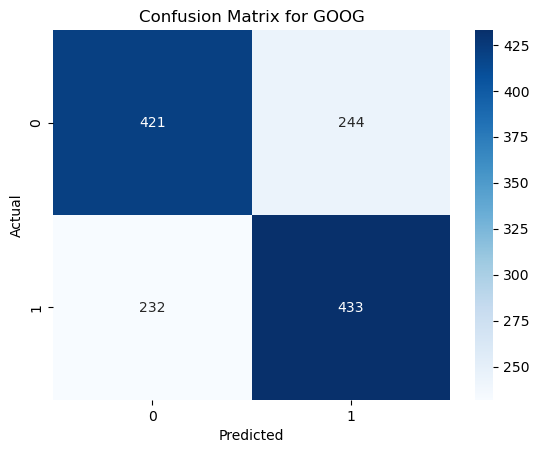


Model Evaluation for META:

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       639
           1       0.70      0.68      0.69       639

    accuracy                           0.69      1278
   macro avg       0.69      0.69      0.69      1278
weighted avg       0.69      0.69      0.69      1278

ROC-AUC Score: 0.6933


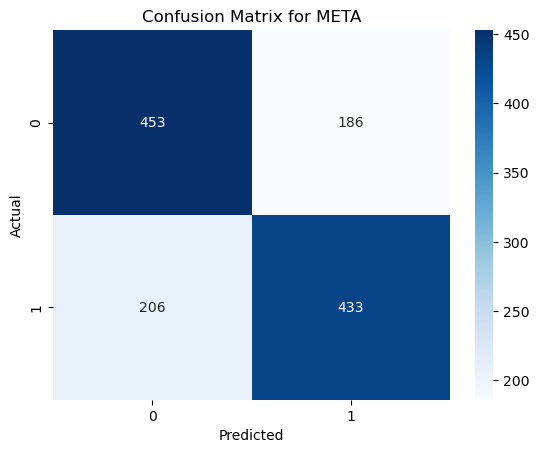


Model Evaluation for AAPL:

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       641
           1       0.71      0.68      0.69       641

    accuracy                           0.70      1282
   macro avg       0.70      0.70      0.70      1282
weighted avg       0.70      0.70      0.70      1282

ROC-AUC Score: 0.6981


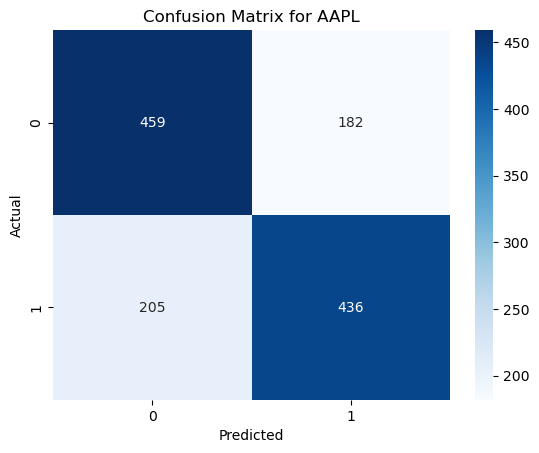


Model Evaluation for F:

              precision    recall  f1-score   support

           0       0.68      0.60      0.63       638
           1       0.64      0.71      0.67       638

    accuracy                           0.66      1276
   macro avg       0.66      0.66      0.65      1276
weighted avg       0.66      0.66      0.65      1276

ROC-AUC Score: 0.6552


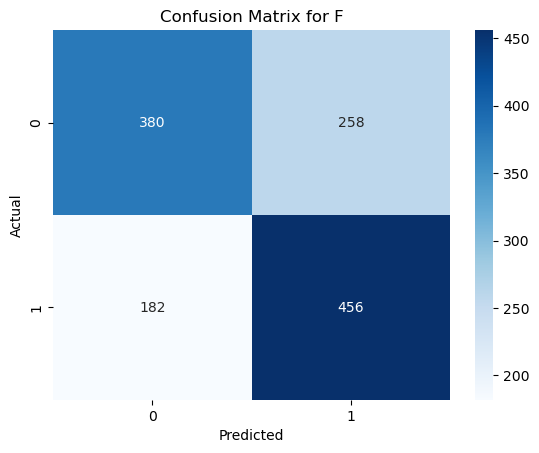


Model Evaluation for NFLX:

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       627
           1       0.56      0.58      0.57       627

    accuracy                           0.56      1254
   macro avg       0.56      0.56      0.56      1254
weighted avg       0.56      0.56      0.56      1254

ROC-AUC Score: 0.5622


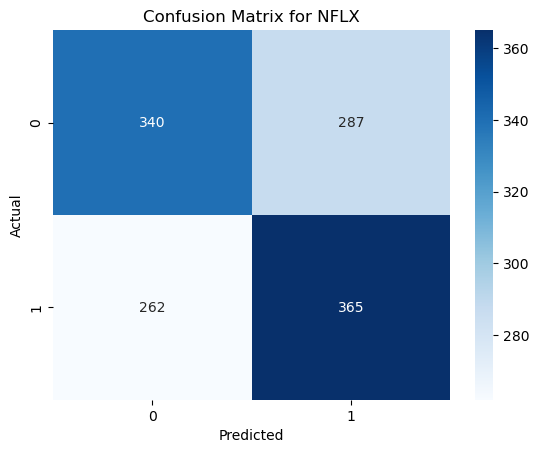

In [ ]:
for ticker, (X_test, y_test) in company_datasets.items():
    print(f"\nModel Evaluation for {ticker}:\n")

    # Compute predictions again
    y_pred = (company_models[ticker].predict_proba(X_test)[:, 1] >= 0.5).astype(int)

    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {ticker}")
    plt.show()


   


In [ ]:
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Create a folder to store models if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling

# Save models and scalers
for ticker, model in company_models.items():
    model_filename = f"saved_models/{ticker}_model.joblib"
    scaler_filename = f"saved_models/{ticker}_scaler.joblib"
    
    joblib.dump(model, model_filename)  # Save the trained model
    joblib.dump(scaler, scaler_filename)  # Save the scaler

    print(f"✅ Model for {ticker} saved as {model_filename}")
    print(f"✅ Scaler for {ticker} saved as {scaler_filename}")



✅ Model for GOOG saved as saved_models/GOOG_model.joblib
✅ Scaler for GOOG saved as saved_models/GOOG_scaler.joblib
✅ Model for META saved as saved_models/META_model.joblib
✅ Scaler for META saved as saved_models/META_scaler.joblib
✅ Model for AAPL saved as saved_models/AAPL_model.joblib
✅ Scaler for AAPL saved as saved_models/AAPL_scaler.joblib
✅ Model for F saved as saved_models/F_model.joblib
✅ Scaler for F saved as saved_models/F_scaler.joblib
✅ Model for NFLX saved as saved_models/NFLX_model.joblib
✅ Scaler for NFLX saved as saved_models/NFLX_scaler.joblib
